# Working with SFS
## Subtypes
fastDFE offers a set of utilities for handling and manipulating site-frequency spectra (SFS) data, especially when there are multiple types. The {class}`~fastdfe.spectrum.Spectra` class is designed to hold and manipulate spectra of multiple types. It provides a number of methods and properties for creating, accessing, and manipulating the spectra data. Usually we would obtain already stratified spectra from {class}`~fastdfe.parser.Parser`, but we can also create them manually.

In [14]:
library(fastdfe)

# load the fastdfe package
fd <- load_fastdfe()

In [10]:
setwd("/Users/au732936/PycharmProjects/fastDFE")
reticulate::use_condaenv("/Users/au732936/miniconda3/envs/dev-r-fastdfe", required = TRUE)
source("R/fastdfe.R")
fd <- load_fastdfe()
# set plot size
options(repr.plot.width = 7, repr.plot.height = 3)

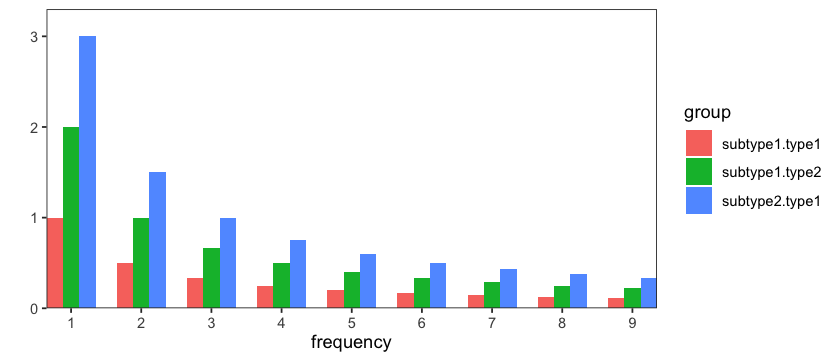

In [11]:
# create spectra with two subtypes and two types
sfs <- fd$Spectra$from_spectra(list(
    subtype1.type1=fd$Spectrum$standard_kingman(10) * 1,
    subtype1.type2=fd$Spectrum$standard_kingman(10) * 2,
    subtype2.type1=fd$Spectrum$standard_kingman(10) * 3
))

# plot spectra
p <- fd$Spectra$plot(sfs)

We access types by their index from which we obtain a {class}`~fastdfe.spectrum.Spectrum` object.

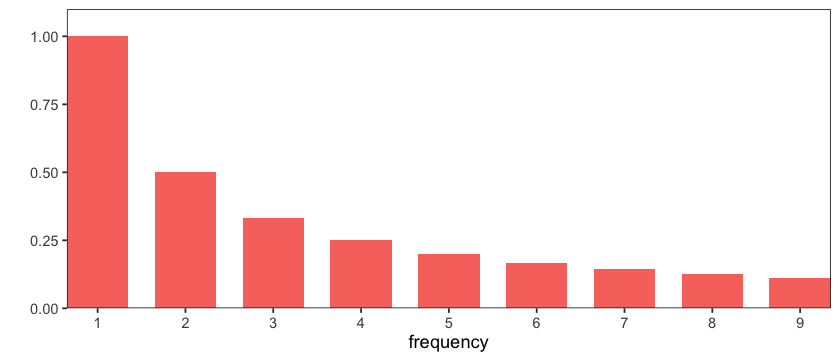

In [12]:
sub <- fd$Spectra$select(sfs, "subtype1.type1")

p <- fd$Spectrum$plot(sub)

We can also use wildcards to access multiple types at once.

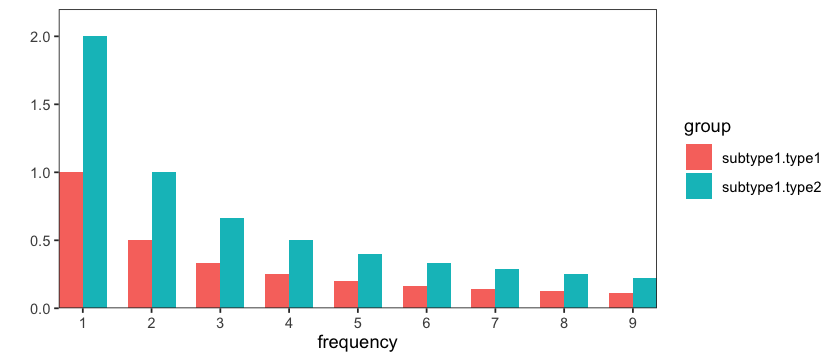

In [13]:
subtypes <- fd$Spectra$select(sfs, "subtype1.*")

p <- fd$Spectra$plot(subtypes)

### Grouping
To get rid of the subtypes, we can merge the spectra over the specified number of groups.

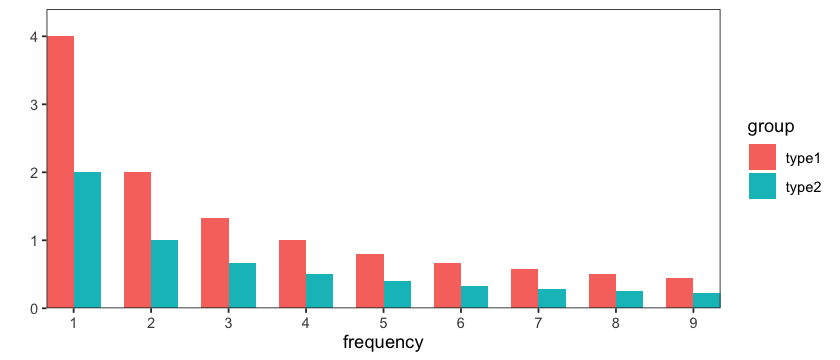

In [14]:
merged <- fd$Spectra$merge_groups(sfs, 1)

p <- fd$Spectra$plot(merged)

All subtypes for each type are merged into a single spectrum by adding them upp.

### Serialization
We can also save the spectra to a file and restore them again.

In [15]:
sfs$to_file("spectra.csv")

sfs2 <- fd$Spectra$from_file("spectra.csv")

### Prefixing
Here we prefix the spectra with a string to distinguish them and then combine them into a single spectra object.

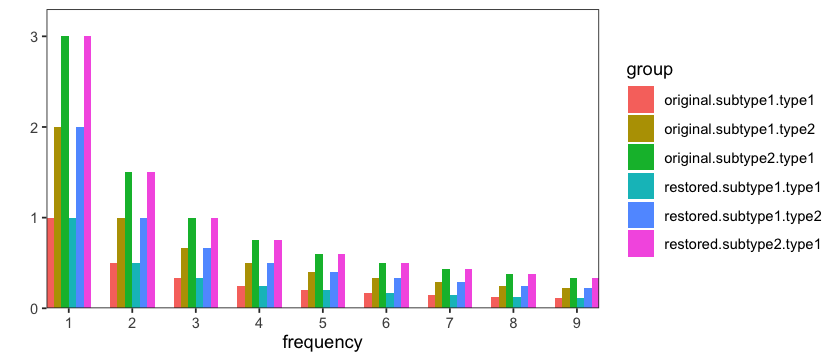

In [16]:
sfs <- fd$Spectra$prefix(sfs, 'original')
sfs2 <- fd$Spectra$prefix(sfs2, 'restored')

combined <- fd$Spectra$combine(sfs, sfs2)

p <- combined$plot()

For a complete reference of the available methods and properties, see {class}`~fastdfe.spectrum.Spectra` and {class}`~fastdfe.spectrum.Spectrum`.

## Folded spectra
{class}`Spectrum` and {class}`Spectra` objects can also be folded by collapsing the bins corresponding to the derived allele counts onto the bins corresponding to the ancestral allele counts. Basing the DFE inference on folded spectra, we have less information to work with, which is particularly noticeable when including beneficial mutations. However, folded spectra are easier to obtain, and are robust to misspecification of the ancestral state, which is often unknown. DFE inference is based on folded spectra whenever spectrum.is_folded is ``True``.

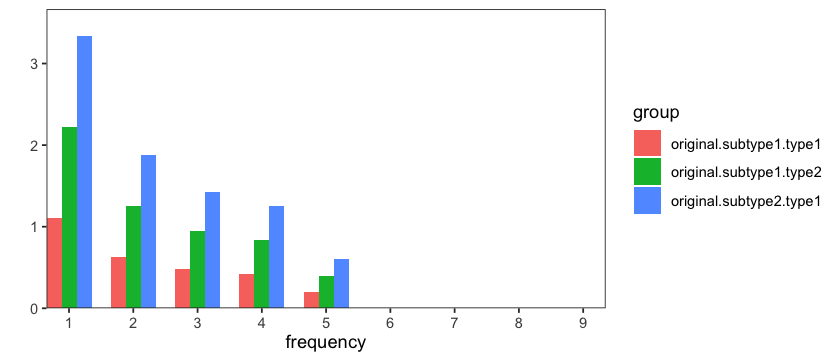

In [17]:
# fold spectra object
folded <- fd$Spectra$fold(sfs)

p <- folded$plot()